In [7]:
from matplotlib_inline import backend_inline
from matplotlib import pyplot as plt
import numpy as np
import json
import os

In [8]:
backend_inline.set_matplotlib_formats('svg')

In [9]:
base_path = "/data/zyk/code/fedmace_benchmark/output/fedprox/"

In [11]:
data = {}
for folder in os.listdir(base_path):
    if os.path.isdir(os.path.join(base_path, folder)):
        if os.path.isfile(os.path.join(base_path, folder, "server", "metric.json")):
            with open(os.path.join(base_path, folder, "setting.json"), "r") as f:
                d = json.load(f)
                key = (d["client_lr"], d["mu"])
            with open(os.path.join(base_path, folder, "server", "metric.json"), "r") as f:
                data[(str(key[0]), str(key[1]))] = json.load(f)

In [12]:
train_f1, local_test_f1, global_test_f1, hamming_loss = {}, {}, {}, {}
for (lr, mu) in data.keys():
    # train_f1[lr] = [data[lr]["train"][str(epoch)]["micro_f1"] for epoch in range(len(data[lr]["train"]))]
    local_test_f1[(lr, mu)] = [
        [data[(lr, mu)]["local_test"][str(epoch)][str(idx)]["micro_f1"] for epoch in range(len(data[(lr, mu)]["local_test"]))]
        for idx in range(4)
    ]
    global_test_f1[(lr, mu)] = [data[(lr, mu)]["global_test"][str(epoch)]["micro_f1"] for epoch in range(len(data[(lr, mu)]["global_test"]))]
    hamming_loss[(lr, mu)] = [data[(lr, mu)]["global_test"][str(epoch)]["hamming_loss"] for epoch in range(len(data[(lr, mu)]["global_test"]))]

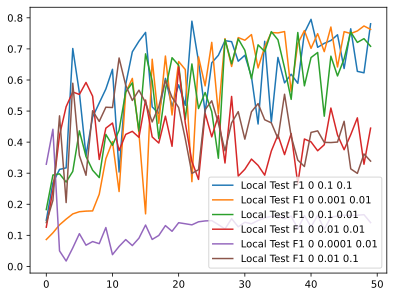

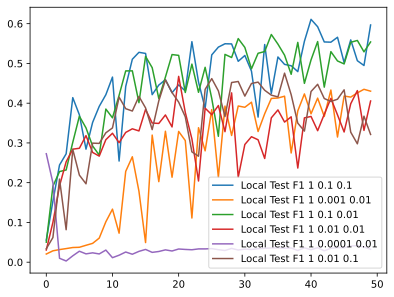

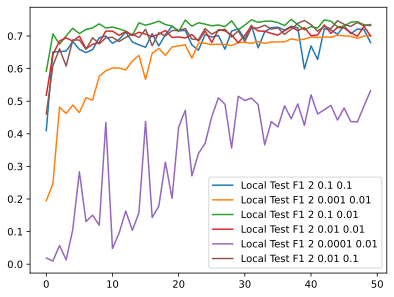

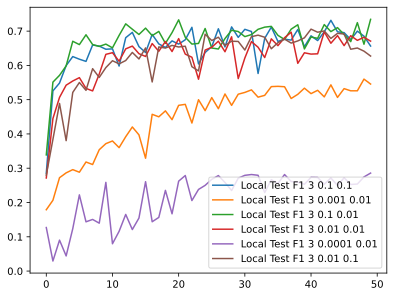

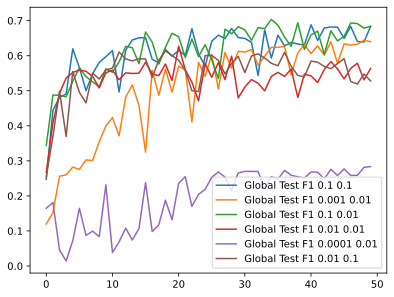

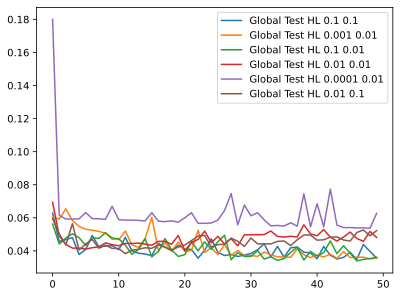

In [13]:
for idx in range(4):
    for (lr, mu) in data.keys():
        plt.plot(range(len(local_test_f1[(lr, mu)][idx])), local_test_f1[(lr, mu)][idx], label=f"Local Test F1 {idx} {lr} {mu}")
    plt.legend()
    plt.show()
for (lr, mu) in data.keys():
    plt.plot(range(len(global_test_f1[(lr, mu)])), global_test_f1[(lr, mu)], label=f"Global Test F1 {lr} {mu}")
plt.legend()
plt.show()
for (lr, mu) in data.keys():
    plt.plot(range(len(hamming_loss[(lr, mu)])), hamming_loss[(lr, mu)], label=f"Global Test HL {lr} {mu}")
plt.legend()
plt.show()

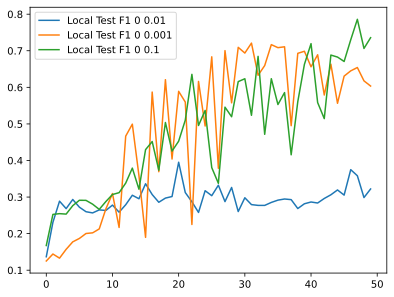

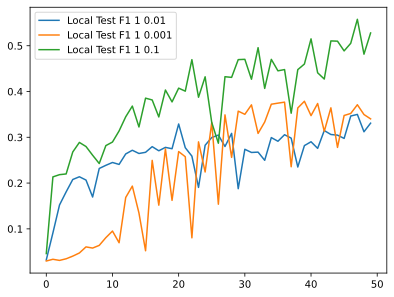

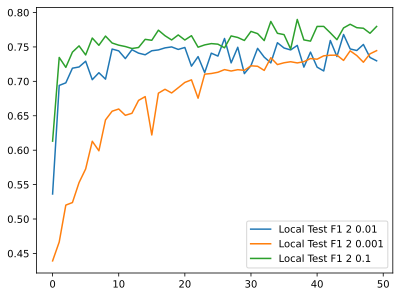

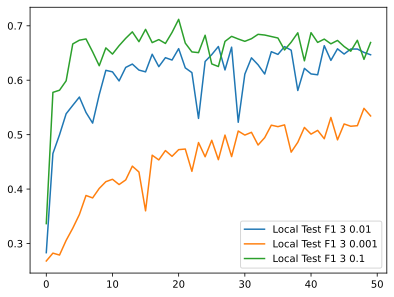

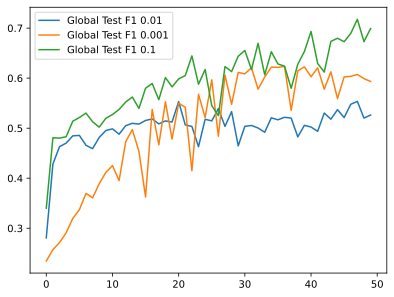

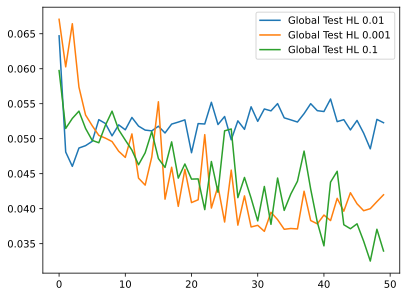

In [30]:
for idx in range(4):
    for lr in data.keys():
        plt.plot(range(len(local_test_f1[lr][idx])), local_test_f1[lr][idx], label=f"Local Test F1 {idx} {lr}")
    plt.legend()
    plt.show()
for lr in data.keys():
    plt.plot(range(len(global_test_f1[lr])), global_test_f1[lr], label=f"Global Test F1 {lr}")
plt.legend()
plt.show()
for lr in data.keys():
    plt.plot(range(len(hamming_loss[lr])), hamming_loss[lr], label=f"Global Test HL {lr}")
plt.legend()
plt.show()

In [20]:
# train_loss = [data["train"][str(epoch)]["loss"] for epoch in range(len(data["train"]))]
# local_test_loss = [
#     [data["local_test"][str(epoch)][str(idx)]["loss"] for epoch in range(len(data["local_test"]))]
#     for idx in range(4)
# ]
# global_test_loss = [data["global_test"][str(epoch)]["loss"] for epoch in range(len(data["train"]))]

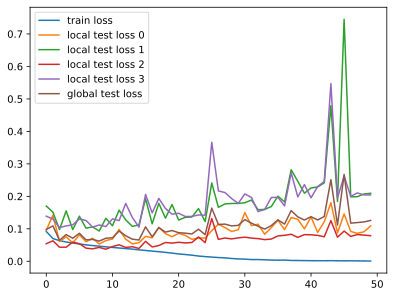

In [23]:
# plt.plot(range(len(train_loss)), train_loss, label="train loss")
# for idx in range(4):
#     plt.plot(range(len(local_test_loss[idx])), local_test_loss[idx], label=f"local test loss {idx}")
# plt.plot(range(len(global_test_loss)), global_test_loss, label="global test loss")
# plt.legend()
# plt.show()

In [24]:
# train_f1 = [data["train"][str(epoch)]["micro_f1"] for epoch in range(len(data["train"]))]
# local_test_f1 = [
#     [data["local_test"][str(epoch)][str(idx)]["micro_f1"] for epoch in range(len(data["local_test"]))]
#     for idx in range(4)
# ]
# global_test_f1 = [data["global_test"][str(epoch)]["micro_f1"] for epoch in range(len(data["train"]))]

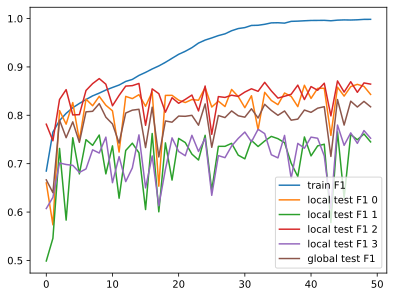

In [25]:
# plt.plot(range(len(train_f1)), train_f1, label="train F1")
# for idx in range(4):
#     plt.plot(range(len(local_test_f1[idx])), local_test_f1[idx], label=f"local test F1 {idx}")
# plt.plot(range(len(global_test_f1)), global_test_f1, label="global test F1")
# plt.legend()
# plt.show()